# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

<p> Question 1: is the distribution of body temperatures normal?

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

(array([ 2.,  0.,  3.,  2.,  3.,  4.,  7.,  7., 12., 11., 13., 14., 13.,
        18.,  2.,  8.,  5.,  3.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([ 96.3 ,  96.48,  96.66,  96.84,  97.02,  97.2 ,  97.38,  97.56,
         97.74,  97.92,  98.1 ,  98.28,  98.46,  98.64,  98.82,  99.  ,
         99.18,  99.36,  99.54,  99.72,  99.9 , 100.08, 100.26, 100.44,
        100.62, 100.8 ]),
 <a list of 25 Patch objects>)

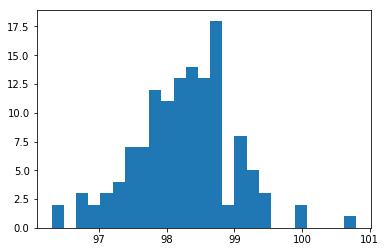

In [15]:
plt.hist(df['temperature'],bins = 25)

In [19]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [25]:
mean_temp = np.mean(df['temperature'])
mean_temp

98.24923076923078

In [26]:
std_temp = np.std(df['temperature'])
std_temp

0.7303577789050377

In [27]:
df['temperature'].count()

130

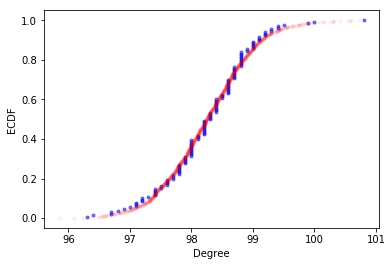

In [60]:
samples_std = np.random.normal(mean_temp,std_temp,size = 1000)
x, y = ecdf(df['temperature'])
x1, y1 = ecdf(samples_std)

# Generate plot
_ = plt.plot(x,y,marker = '.',linestyle = 'none', color = 'blue', alpha = 0.5)
_ = plt.plot(x1,y1,marker = '.',linestyle = 'none', color ='red',alpha = 0.05)

# Label the axes
_ = plt.xlabel('Degree')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

<p> Answer to 1: the data of human temperature is 
    normally distributed.

<p> Question 2: Is the sample size large? Are the observations independent?
<p> Answer 2: The sample size is small based on observation of the histogram. The observations are independent.

<p> Question 3: Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
        

In [46]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [47]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [51]:
temp = df['temperature']
print(type(temp))

<class 'pandas.core.series.Series'>


0.06405661469519336
0.06454129165427636


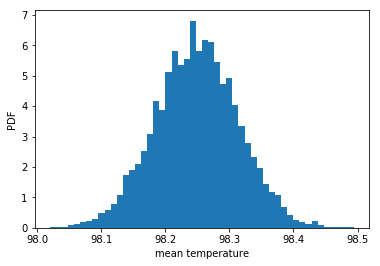

In [53]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(temp, np.mean,size=10000)

# Compute and print SEM
sem = np.std(temp) / np.sqrt(len(temp))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [70]:
# Make an array of translated temperature: translated_temp
translated_temp = temp - np.mean(temp) + 98.6

# Take bootstrap replicates temperatures: bs_replicates
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature in  Carl Wunderlich's book: p
p = np.sum(bs_replicates <= np.mean(temp)) / 10000

# Print the p-value
print('p = ',p)

p =  0.0


<p> Answer 3:

<p> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
<li> I would use one-sample test, because temperature is independent from each other. There's no dependent variable in the dataset.
<p> In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
<li> It is appropriate to use t statistics, because standard deviation of the population is not available.
<p> Now try using the other test. How is the result be different? Why?
<li> Question need clarification. What is the other test????

<p>  Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [63]:
sample_temp =  temp.sample(n=10,random_state=123)

In [68]:
# Make an array of translated temperature: translated_temp
translated_sample_temp = sample_temp - np.mean(sample_temp) + 98.6

# Take bootstrap replicates temperatures: bs_replicates
bs_replicates2 = draw_bs_reps(translated_sample_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature in  Carl Wunderlich's book: p
p = np.sum(bs_replicates2 <= np.mean(sample_temp)) / 10000

# Print the p-value
print('p = ',p)

p =  0.0002


0.13375350462698113
0.1346640293322603


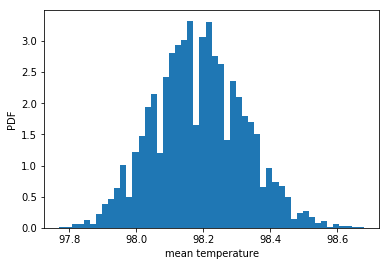

In [69]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates3
bs_replicates3 = draw_bs_reps(sample_temp, np.mean,size=10000)

# Compute and print SEM
sem = np.std(sample_temp) / np.sqrt(len(sample_temp))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std3 = np.std(bs_replicates3)
print(bs_std3)

# Make a histogram of the results
_ = plt.hist(bs_replicates3, bins=50, density=True)
_ = plt.xlabel('mean temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [98.12769231 98.37076923] degree


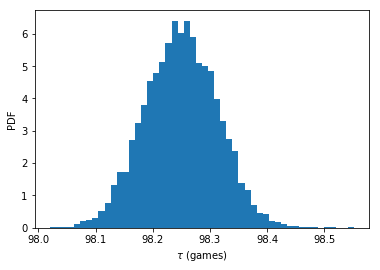

In [105]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(temp,np.mean,10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =',conf_int, 'degree')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

<p> Answer 4:
<p>Draw a small sample of size 10 from the data and repeat both frequentist tests.
<p> Which one is the correct one to use?
    <li> t statistics is the correct one to use.
<p> What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?
    <li> ????

<p> Question 5:
<p>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. ????

95% confidence interval = [ 96.8225 100.    ] degrees


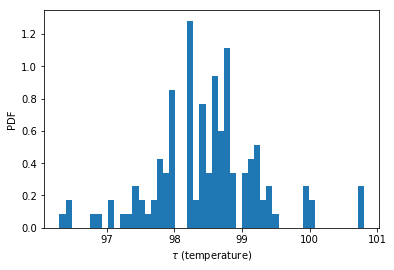

In [85]:
def bootstrap_replicate_1d_2(data):
    return np.random.choice(data, size=len(data))

def draw_bs_reps_2(data, size=1):
    bs_replicates = bootstrap_replicate_1d_2(data)
    return bs_replicates

# Draw bootstrap replicates of the mean temp: bs_replicates
bs_replicates1 = draw_bs_reps_2(temp,1)

# Compute the 99.8% confidence interval: conf_int
conf_int = np.percentile(bs_replicates1,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =',conf_int, 'degrees')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates1, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (temperature)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [96.7225 99.4775] degrees


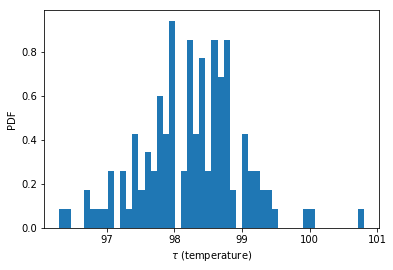

In [73]:
conf_int_freq = np.percentile(temp,[2.5,97.5])
# Print the confidence interval
print('95% confidence interval =',conf_int_freq, 'degrees')

# Plot the histogram of the replicates
_ = plt.hist(temp, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (temperature)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

<p>  Question 6:
<p>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.

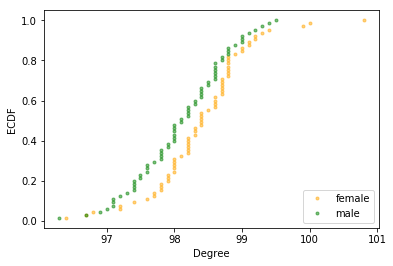

In [90]:
female_temp = df[df['gender'] == 'F']['temperature']
male_temp = df[df['gender'] == 'M']['temperature']

x_f, y_f = ecdf(female_temp )
x_m, y_m = ecdf(male_temp)

# Generate plot
_ = plt.plot(x_f, y_f, marker = '.',linestyle = 'none', color = 'orange', alpha = 0.5)
_ = plt.plot(x_m, y_m, marker = '.',linestyle = 'none', color ='green',alpha = 0.5)

# Label the axes
_ = plt.xlabel('Degree')
_ = plt.ylabel('ECDF')
_ = plt.legend(['female','male'],loc = 'lower right')
# Display the plot
plt.show()

In [101]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate([data1,data2])

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [97]:
def diff_of_means(df1, df2):
    """Difference in means of two arrays."""

    # The difference of means of female_temp, male_temp: diff
    diff = np.mean(df1)-np.mean(df2))

    return diff

In [102]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [103]:
# Compute difference of mean temp from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(female_temp, male_temp)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(female_temp, male_temp,
                                  diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0119


<p>  Anwser 6:
<p>  Is there a significant difference between males and females in normal temperature? Yes, there is.
<p> What testing approach did you use and why?
    <li> I used permutation samples to test the probability of null hypothesis is true.
<p> Write a story with your conclusion in the context of the original problem.
    <li> The mean normal body temperature was held to be 37 ∘ C or 98.6 ∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. By ramdomly sampling 130 males and femnales, we concluded that, the empirical mean is significantly different from the originally believed value of 98.6 ∘ F. In addition, the probability that female temperature and male temperature has no difference is 1.19%.